In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import camutils
import calibration
import decode
from config import CAM1_CALIB, CAM2_CALIB, CHESSBOARD, CAM1_CALIB_EX, CAM2_CALIB_EX, MASK_PREFIX, COLOR_IMAGE_1, COLOR_IMAGE_2

In [2]:
# Set up chessboard
chessboardDimensions = CHESSBOARD
cam1Images = calibration.getImages(CAM1_CALIB) # left
cam2Images = calibration.getImages(CAM2_CALIB) # right

Found 20 images
Found 20 images


In [6]:
# Intrinsic camera calibration
cam1K = calibration.intrinsic_Calibration(chessboardDimensions, cam1Images, False)
cam2K = calibration.intrinsic_Calibration(chessboardDimensions, cam2Images, False)
print(f"Cam1 K = {cam1K}")
print(f"Cam2 K = {cam2K}")

Cam1 K = [[1.40342239e+03 0.00000000e+00 9.59837032e+02]
 [0.00000000e+00 1.40116582e+03 5.83454863e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Cam2 K = [[1.41025245e+03 0.00000000e+00 9.63549938e+02]
 [0.00000000e+00 1.40794026e+03 5.99720531e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


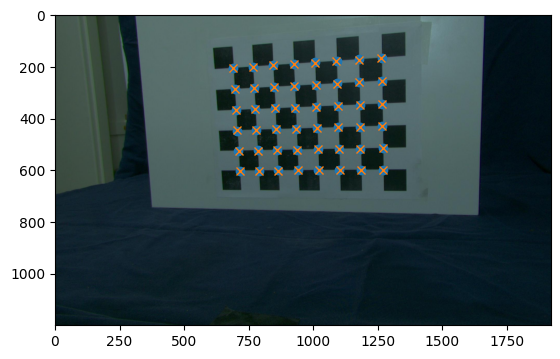

Camera : 
 f=1402.2941082854932 
 c=[[959.83703213 583.45486267]] 
 R=[[ 0.03884436  0.98981169  0.13698147]
 [ 0.97696218 -0.00883092 -0.2132297 ]
 [-0.20984758  0.14210849 -0.96735163]] 
 t = [[ 7.22817482 20.90563403 50.59019818]]


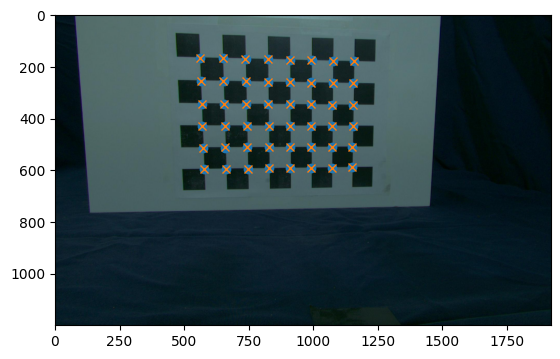

Camera : 
 f=1409.0963508438579 
 c=[[963.54993838 599.72053131]] 
 R=[[-0.00226799  0.99087013  0.13480073]
 [ 0.99277887 -0.01393666  0.11914652]
 [ 0.1199374   0.13409754 -0.98368332]] 
 t = [[ 8.29185692  7.74888118 51.40249373]]


In [7]:
# Extrinsic camera calibration
cam1Image = CAM1_CALIB_EX
cam2Image = CAM2_CALIB_EX

cam1, cam1_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam1Image, cam1K)
cam2, cam2_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam2Image, cam2K)

# Display
plt.figure()
pts2Lp = cam1.project(pts3)
imageLeft = plt.imread(cam1Image)
plt.imshow(imageLeft)
plt.plot(pts2Lp[0,:],pts2Lp[1,:],'o')
plt.plot(cam1_pts2[0,:],cam1_pts2[1,:],'x')
plt.show()
print(cam1)

plt.figure()
pts2Rp = cam2.project(pts3)
imageRight = plt.imread(cam2Image)
plt.imshow(imageRight)
plt.plot(pts2Rp[0,:],pts2Rp[1,:],'o')
plt.plot(cam2_pts2[0,:],cam2_pts2[1,:],'x')
plt.show()
print(cam2)


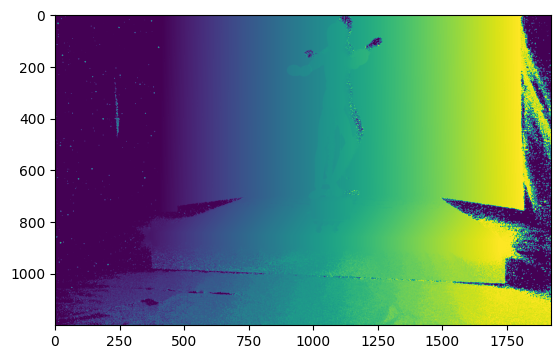

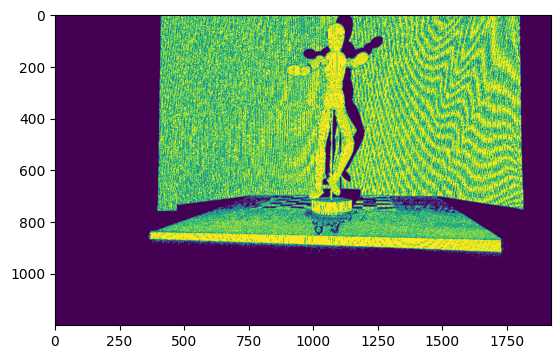

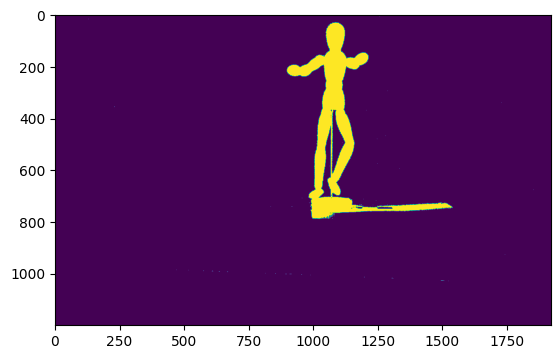

In [5]:
#( .png images)

# Code and gray mask
gray_threshold = 0.01
imagePrefix = MASK_PREFIX
code, mask = decode.decode_gray(imagePrefix, 0, gray_threshold)
plt.figure() 
plt.imshow(code)
plt.figure() 
plt.imshow(mask)

# Color mask 
color_threshold = 0.009
colorImage1 = COLOR_IMAGE_1
colorImage2 = COLOR_IMAGE_2
color_mask = decode.decode_color(colorImage1, colorImage2, color_threshold)


plt.figure() 
plt.imshow(color_mask)